#### Load the data and necessary libraries

In [2]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma.csv')

## Exploring Year Range: 1970 to 2016

### Top 10 Highest Spending Countries (Average Per Capita)

This table ranks the top 10 highest spending countries by their average spending per capita in USD.

| Rank | Country Code | Country Name     | Avg Per Capita ($ USD) |
|:----:|:------------:|:----------------:|:-----------------------------------:|
| 1    | USA          | United States    | 859.267875                          |
| 2    | LUX          | Luxembourg       | 478.168190                          |
| 3    | ITA          | Italy            | 446.421276                          |
| 4    | SVN          | Slovenia         | 446.030071                          |
| 5    | CHE          | Switzerland      | 439.933710                          |
| 6    | FRA          | France           | 425.926367                          |
| 7    | SVK          | Slovakia         | 419.662529                          |
| 8    | JPN          | Japan            | 395.892562                          |
| 9    | AUT          | Austria          | 386.203692                          |
| 10   | GRC          | Greece           | 384.818630                          |



#### Supporting Python Code:

In [3]:
# Identify the Top 10 highest spending countries (Per Capita)
top_10_per_cap = df.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Highest Spending Countries:")
print(top_10_per_cap)

Top 10 Highest Spending Countries:
LOCATION
USA    859.267875
LUX    478.168190
ITA    446.421276
SVN    446.030071
CHE    439.933710
FRA    425.926367
SVK    419.662529
JPN    395.892562
AUT    386.203692
GRC    384.818630
Name: USD_CAP, dtype: float64


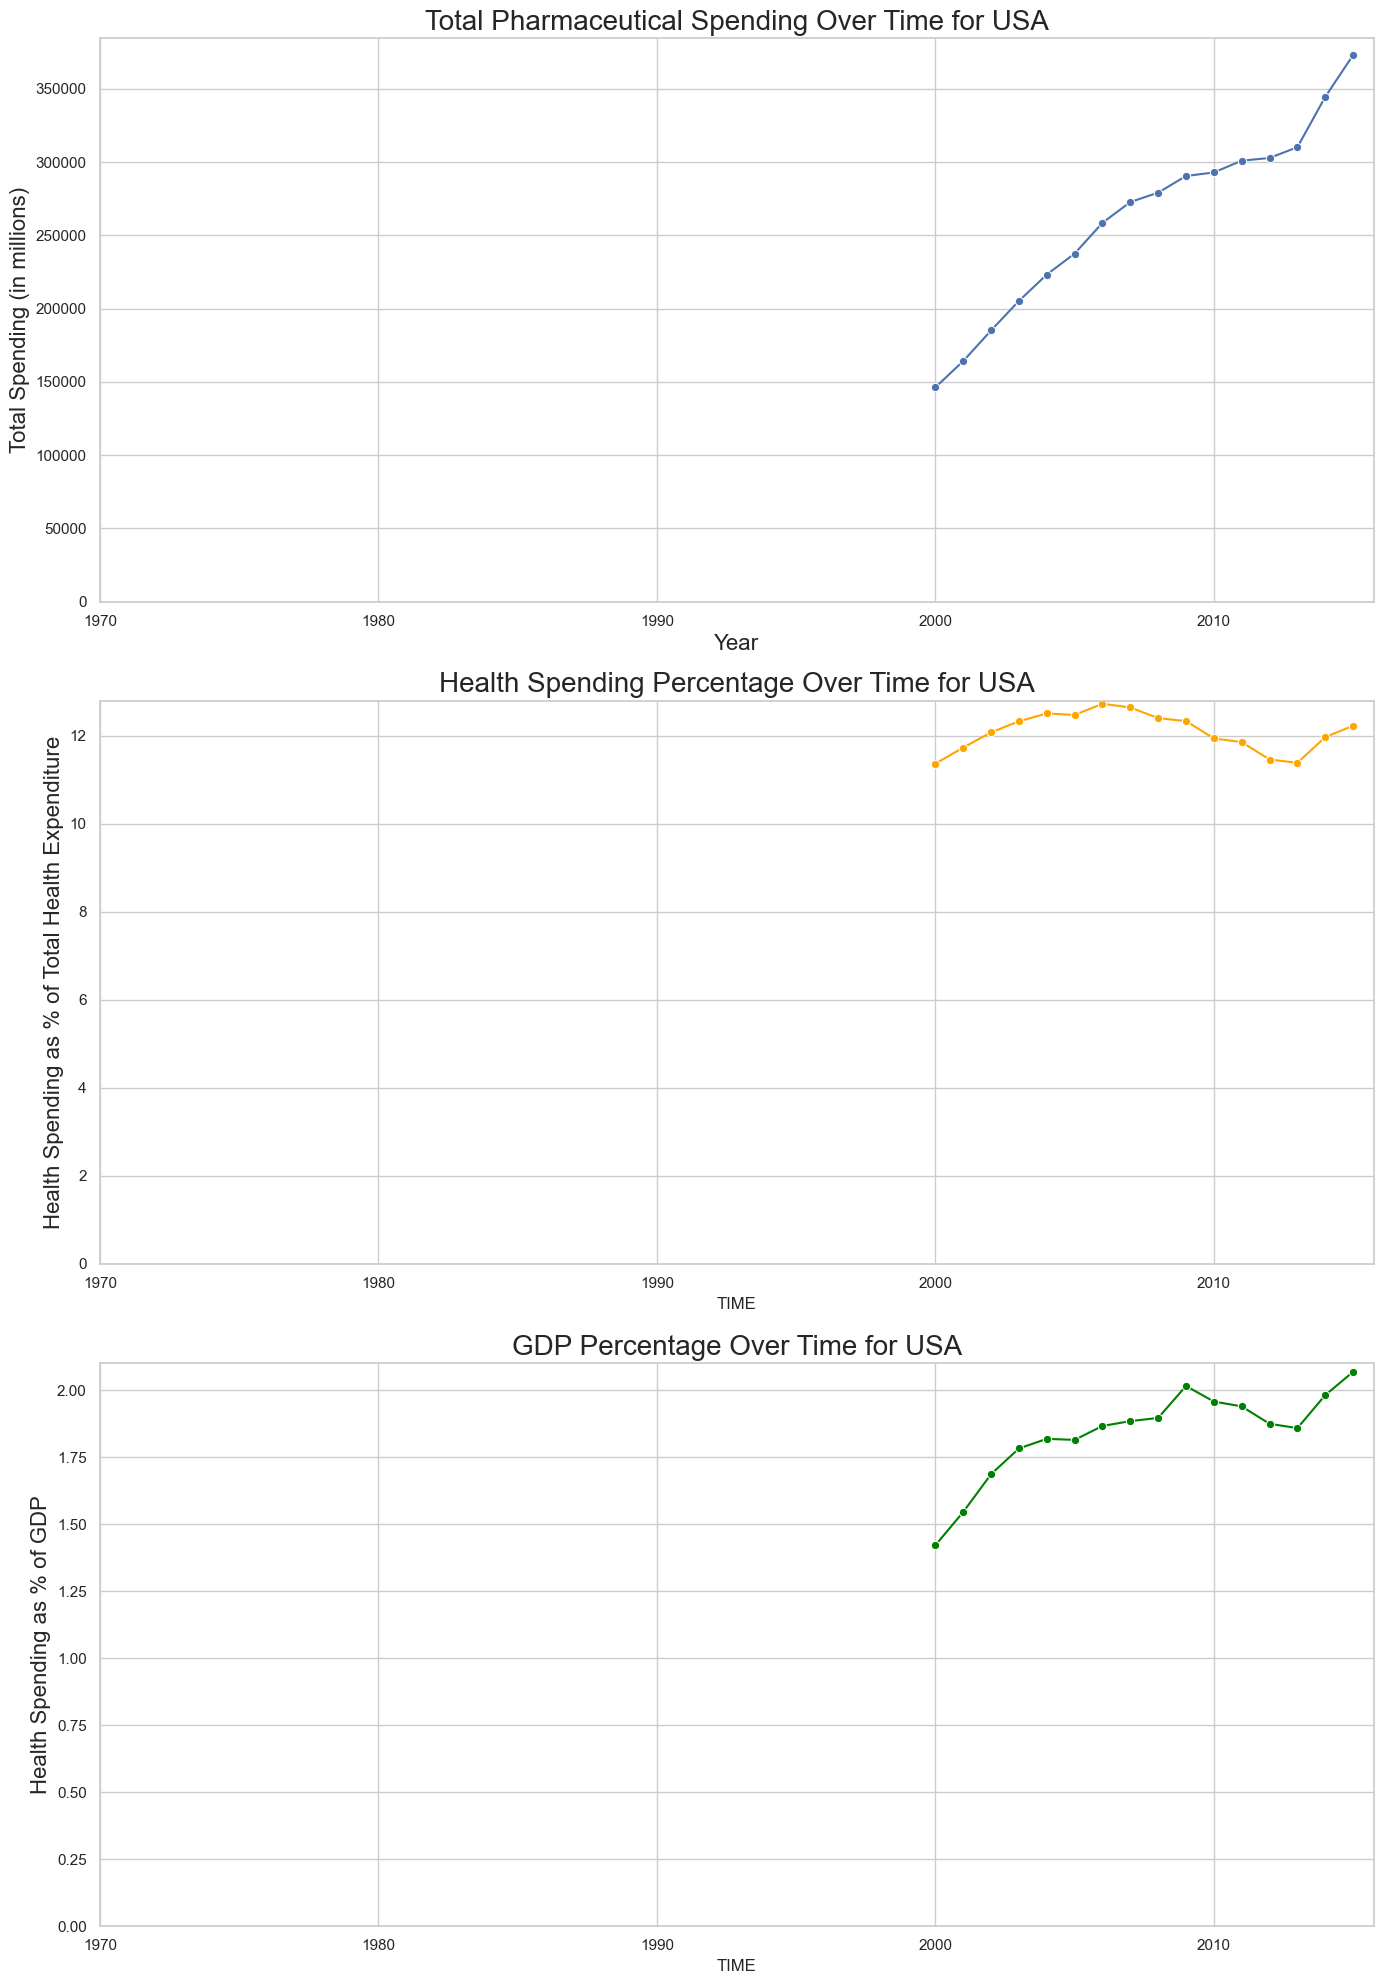

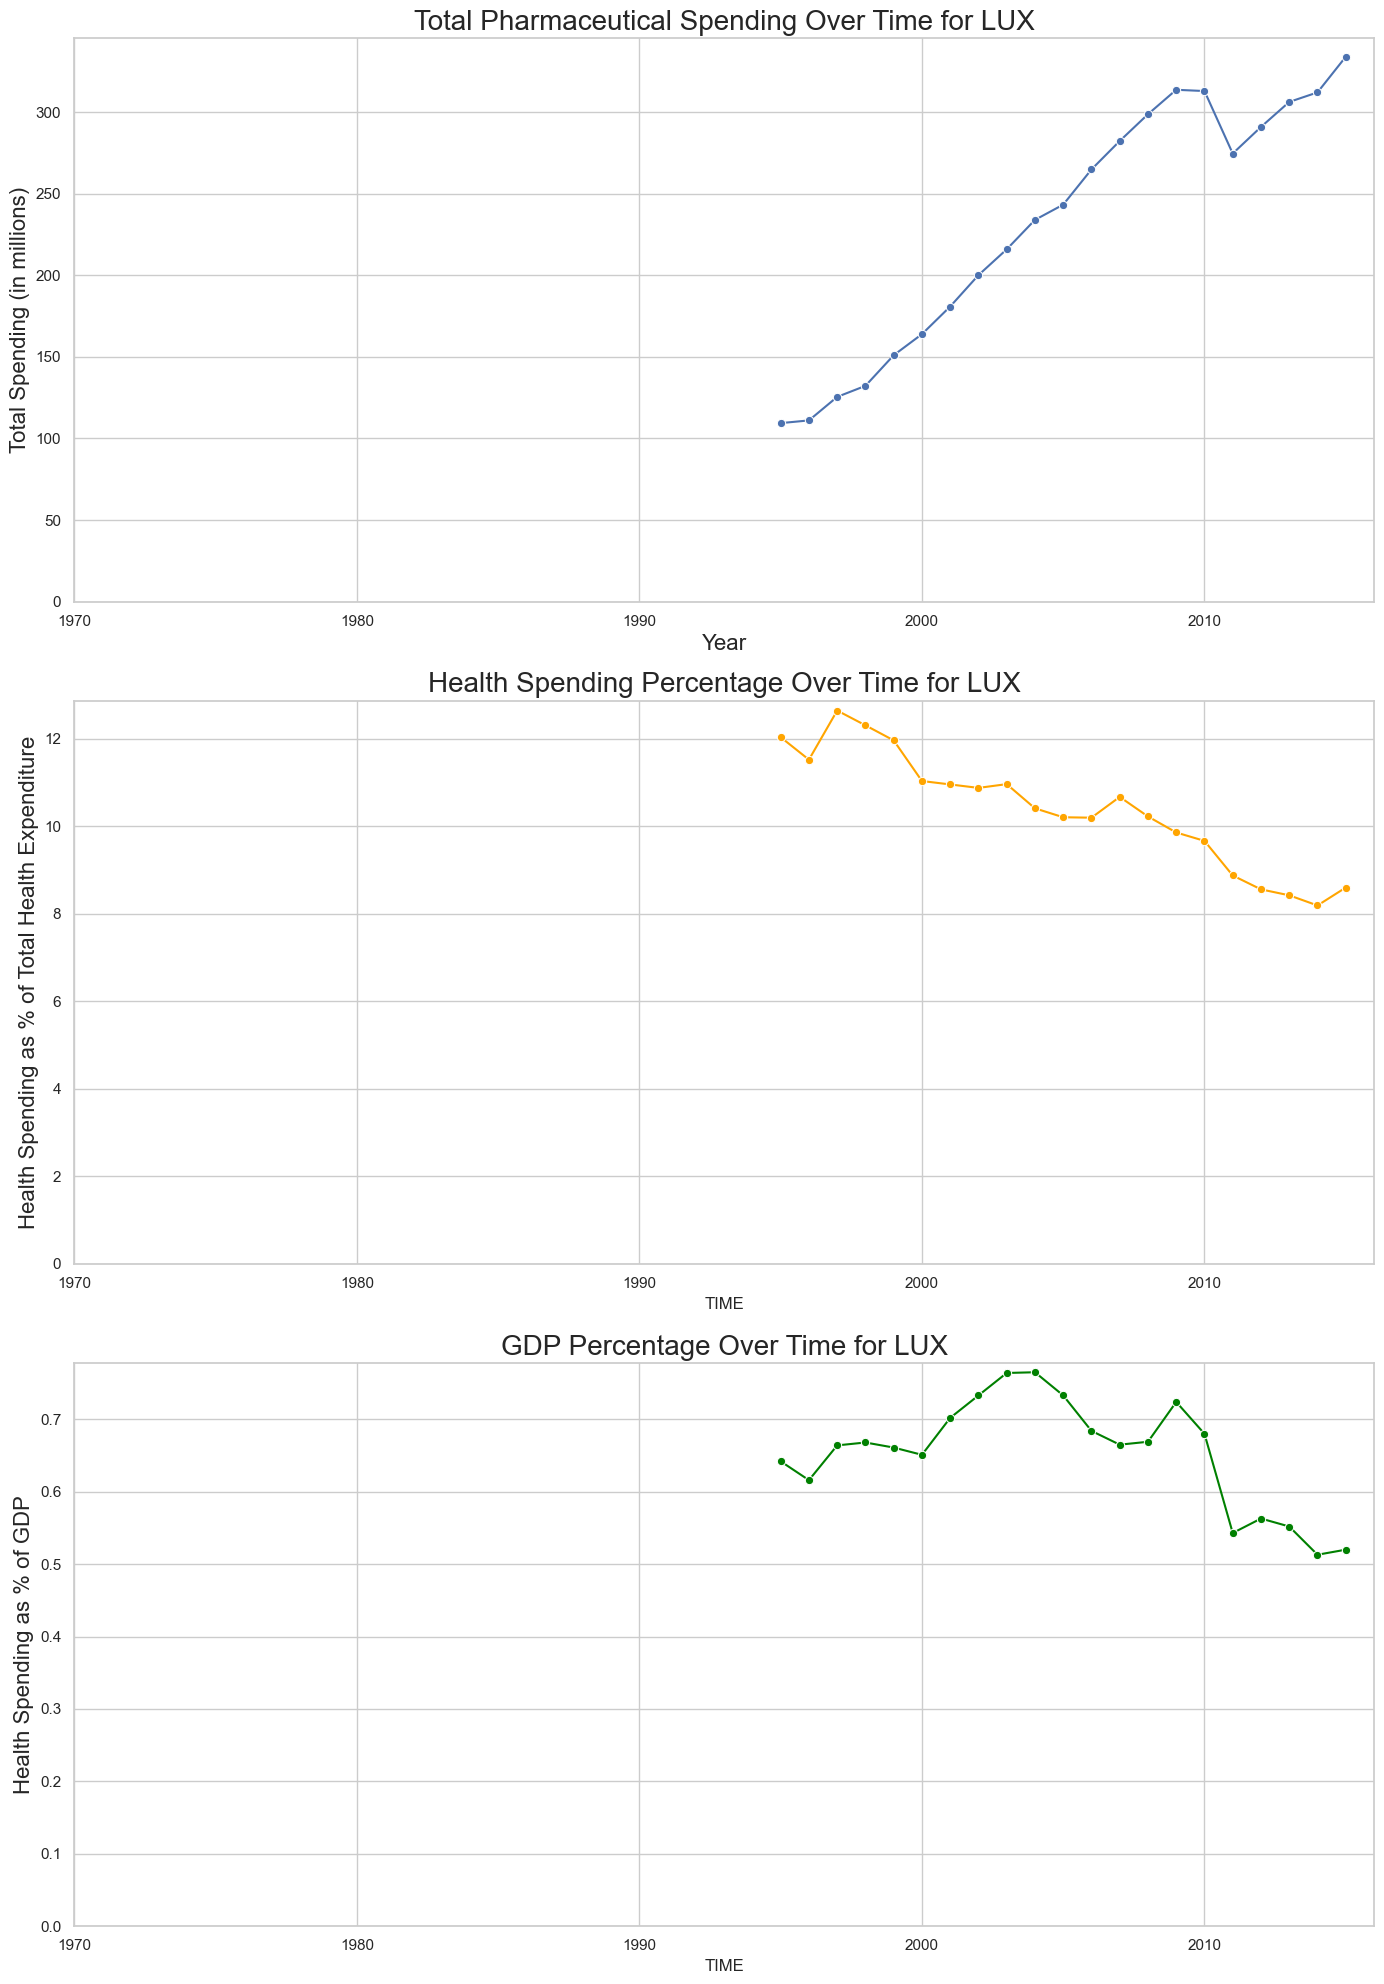

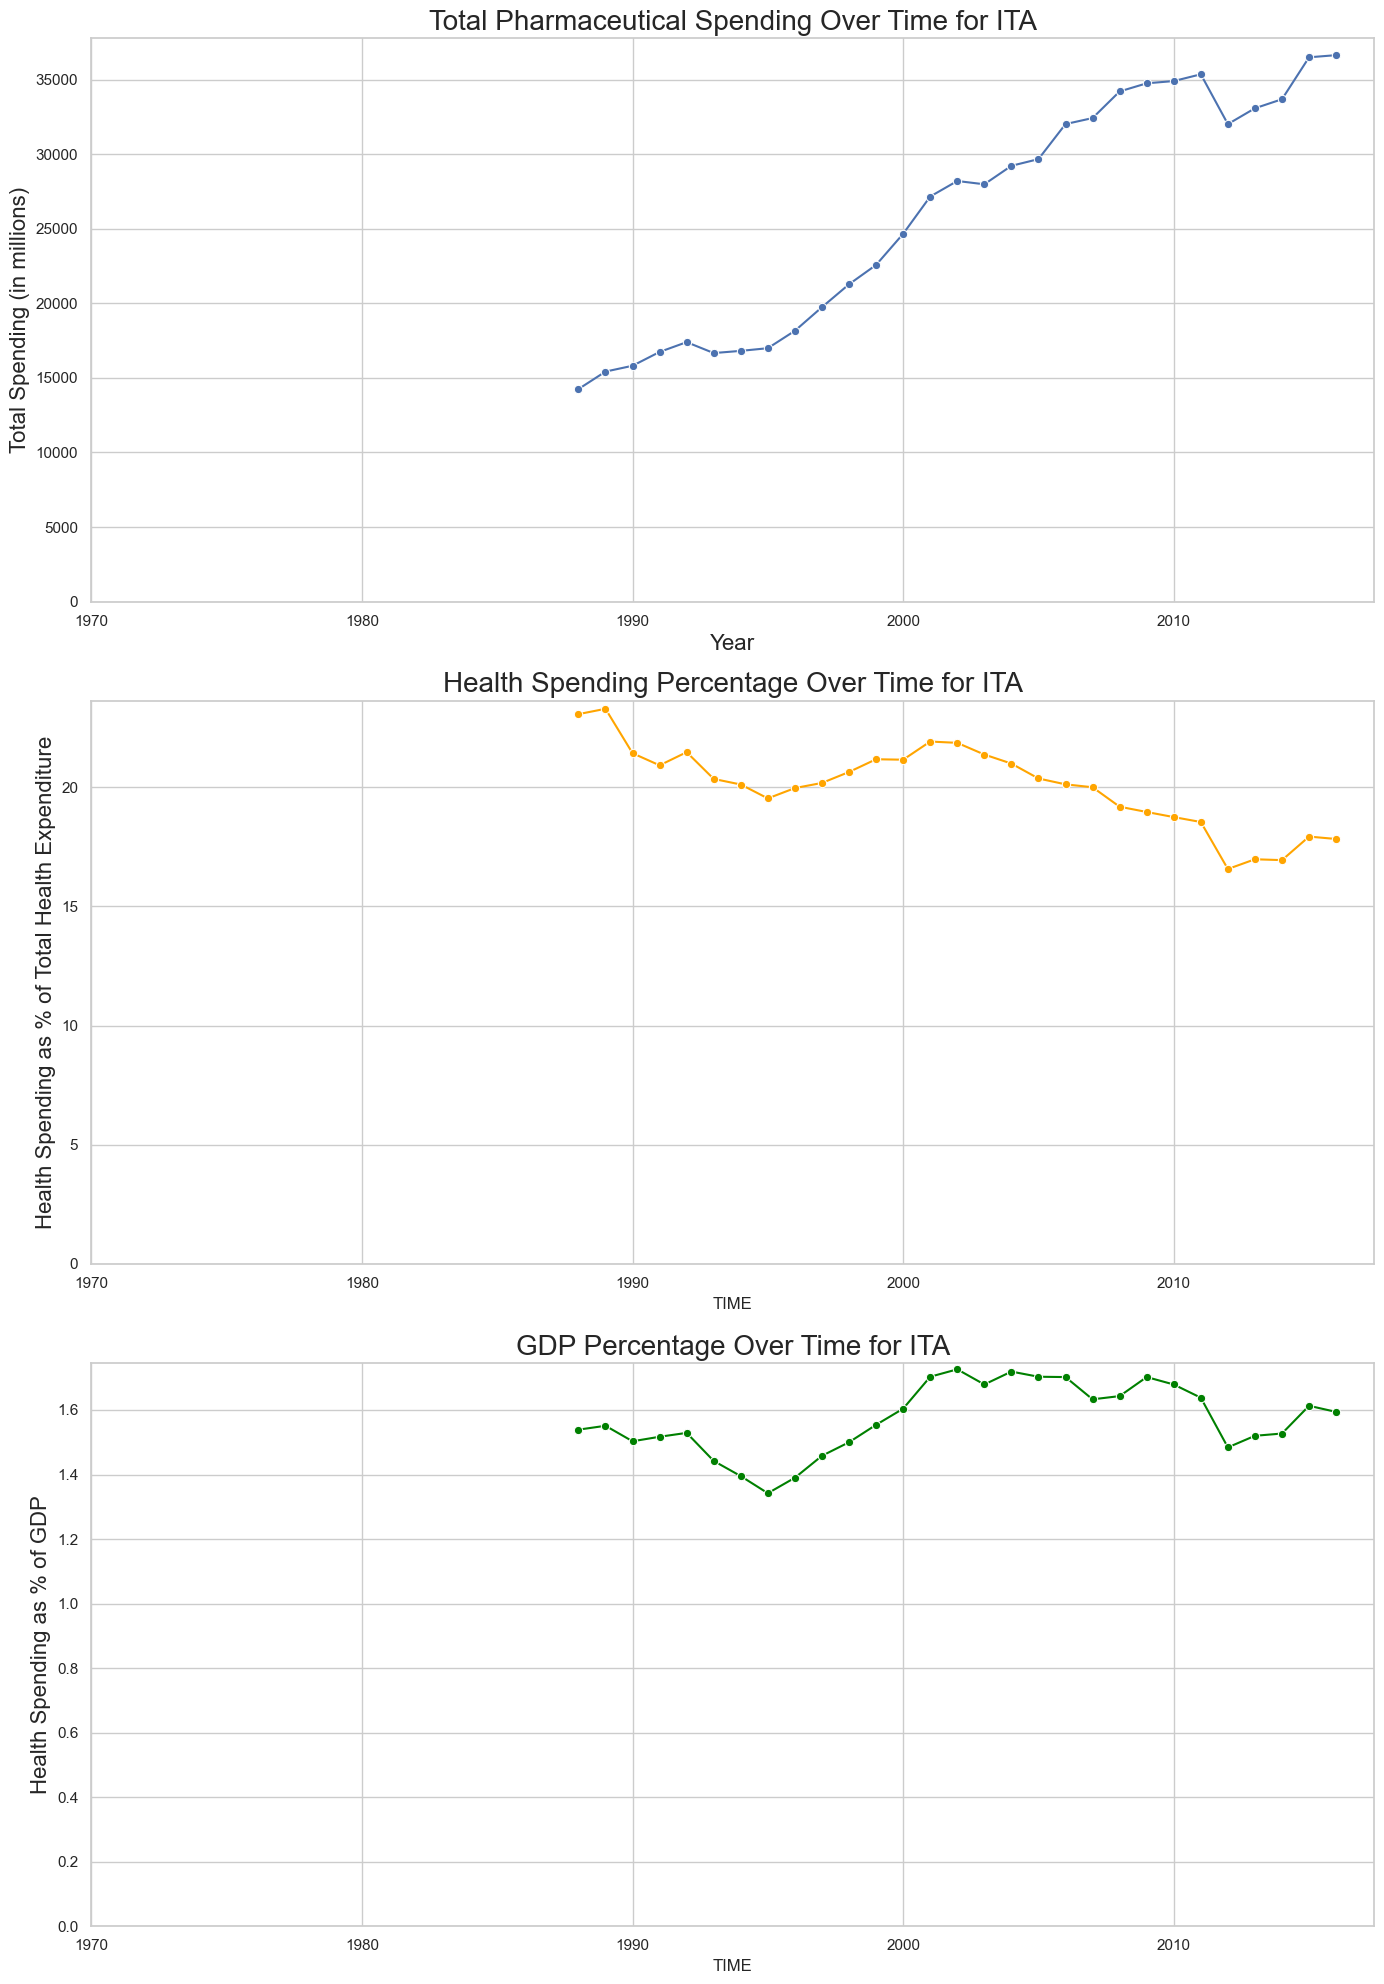

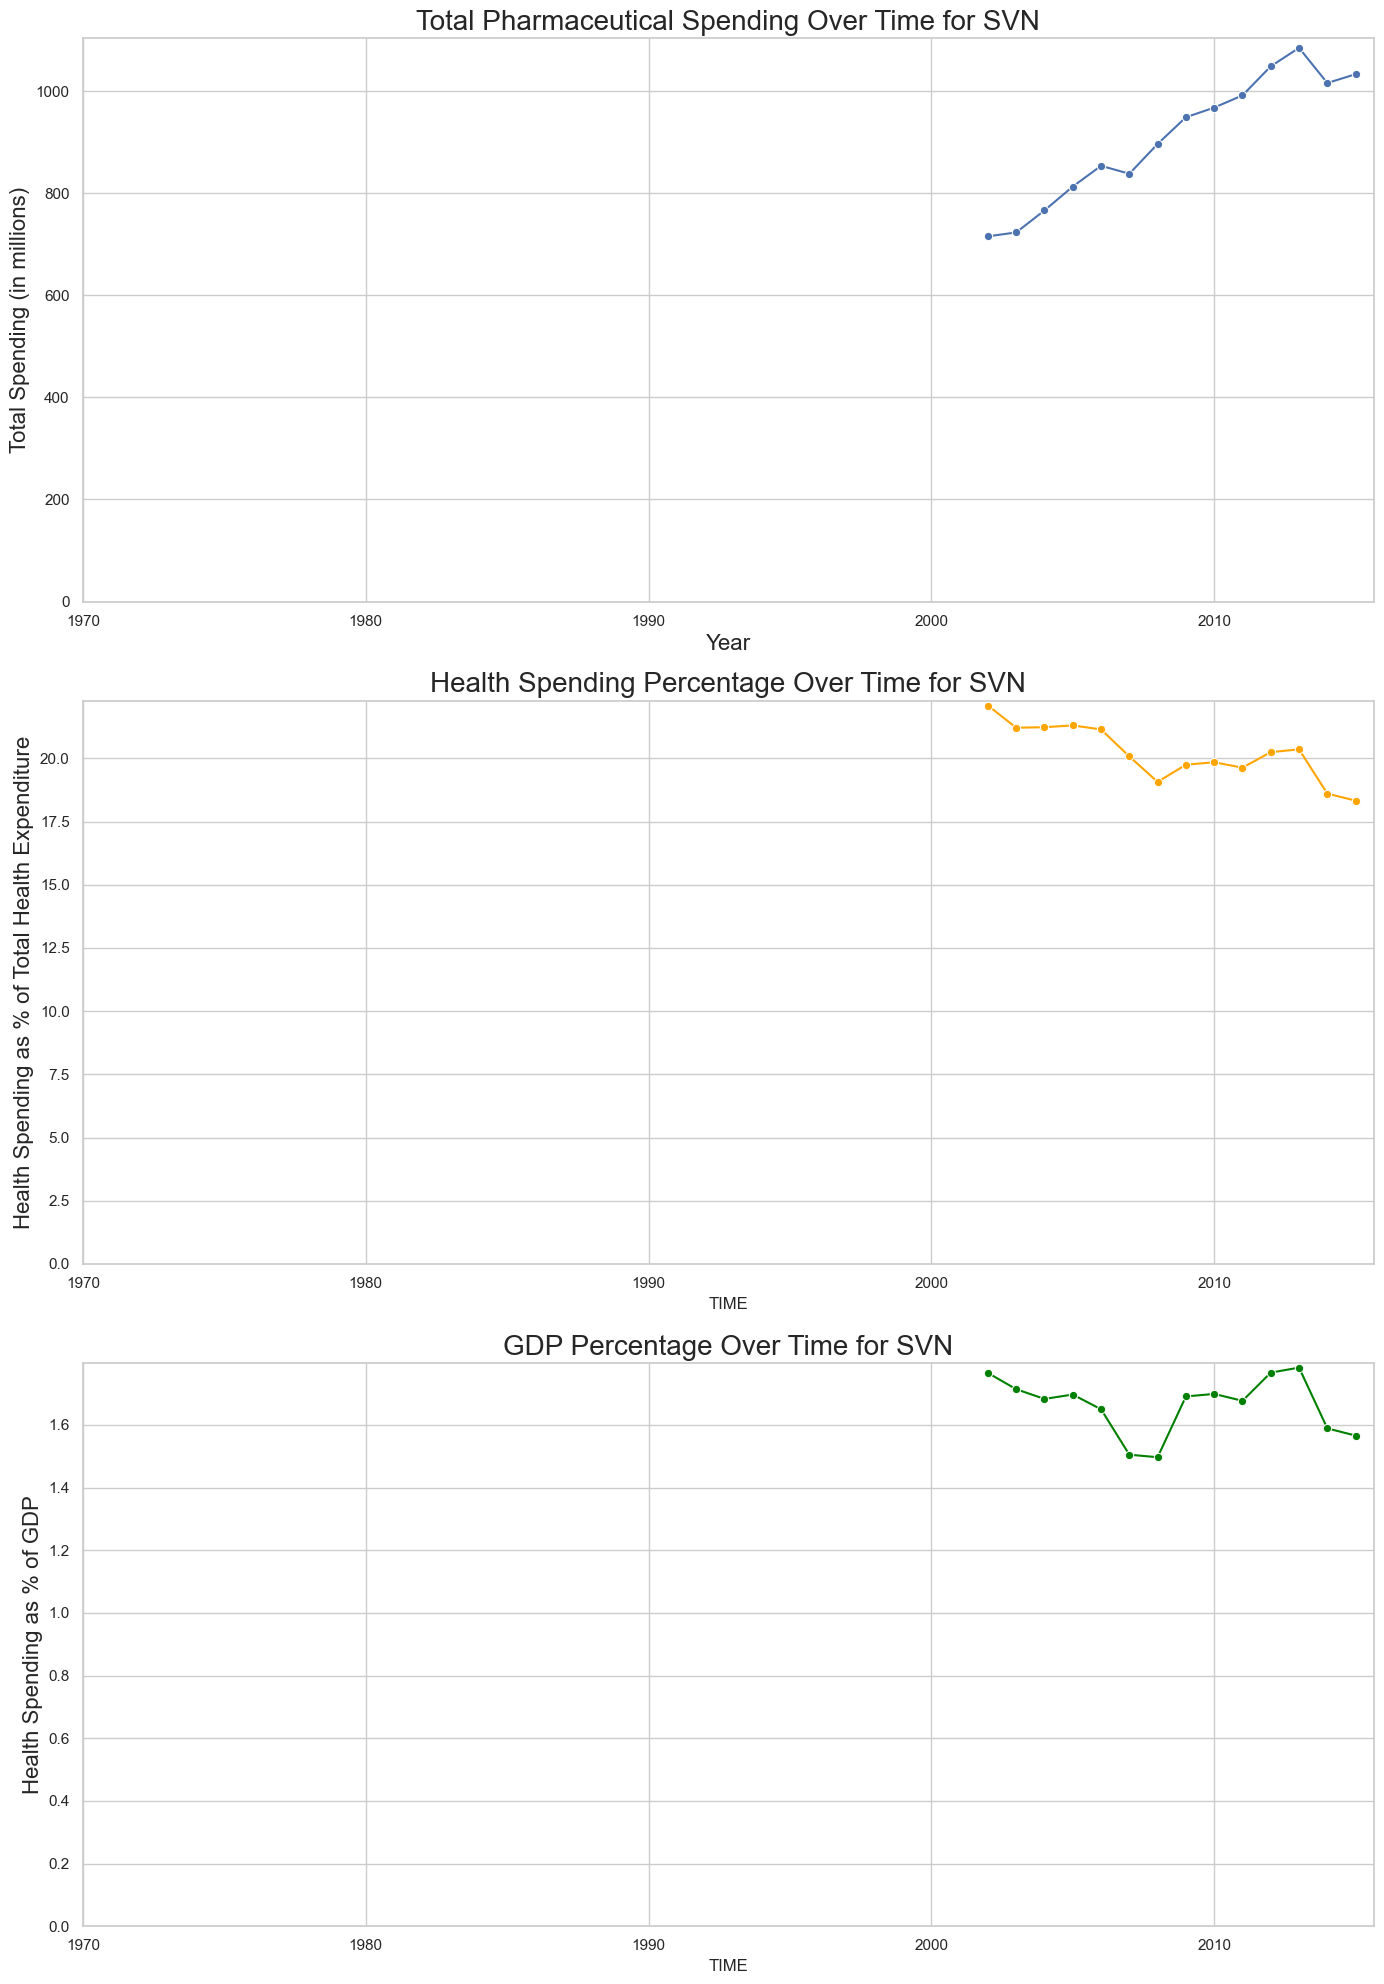

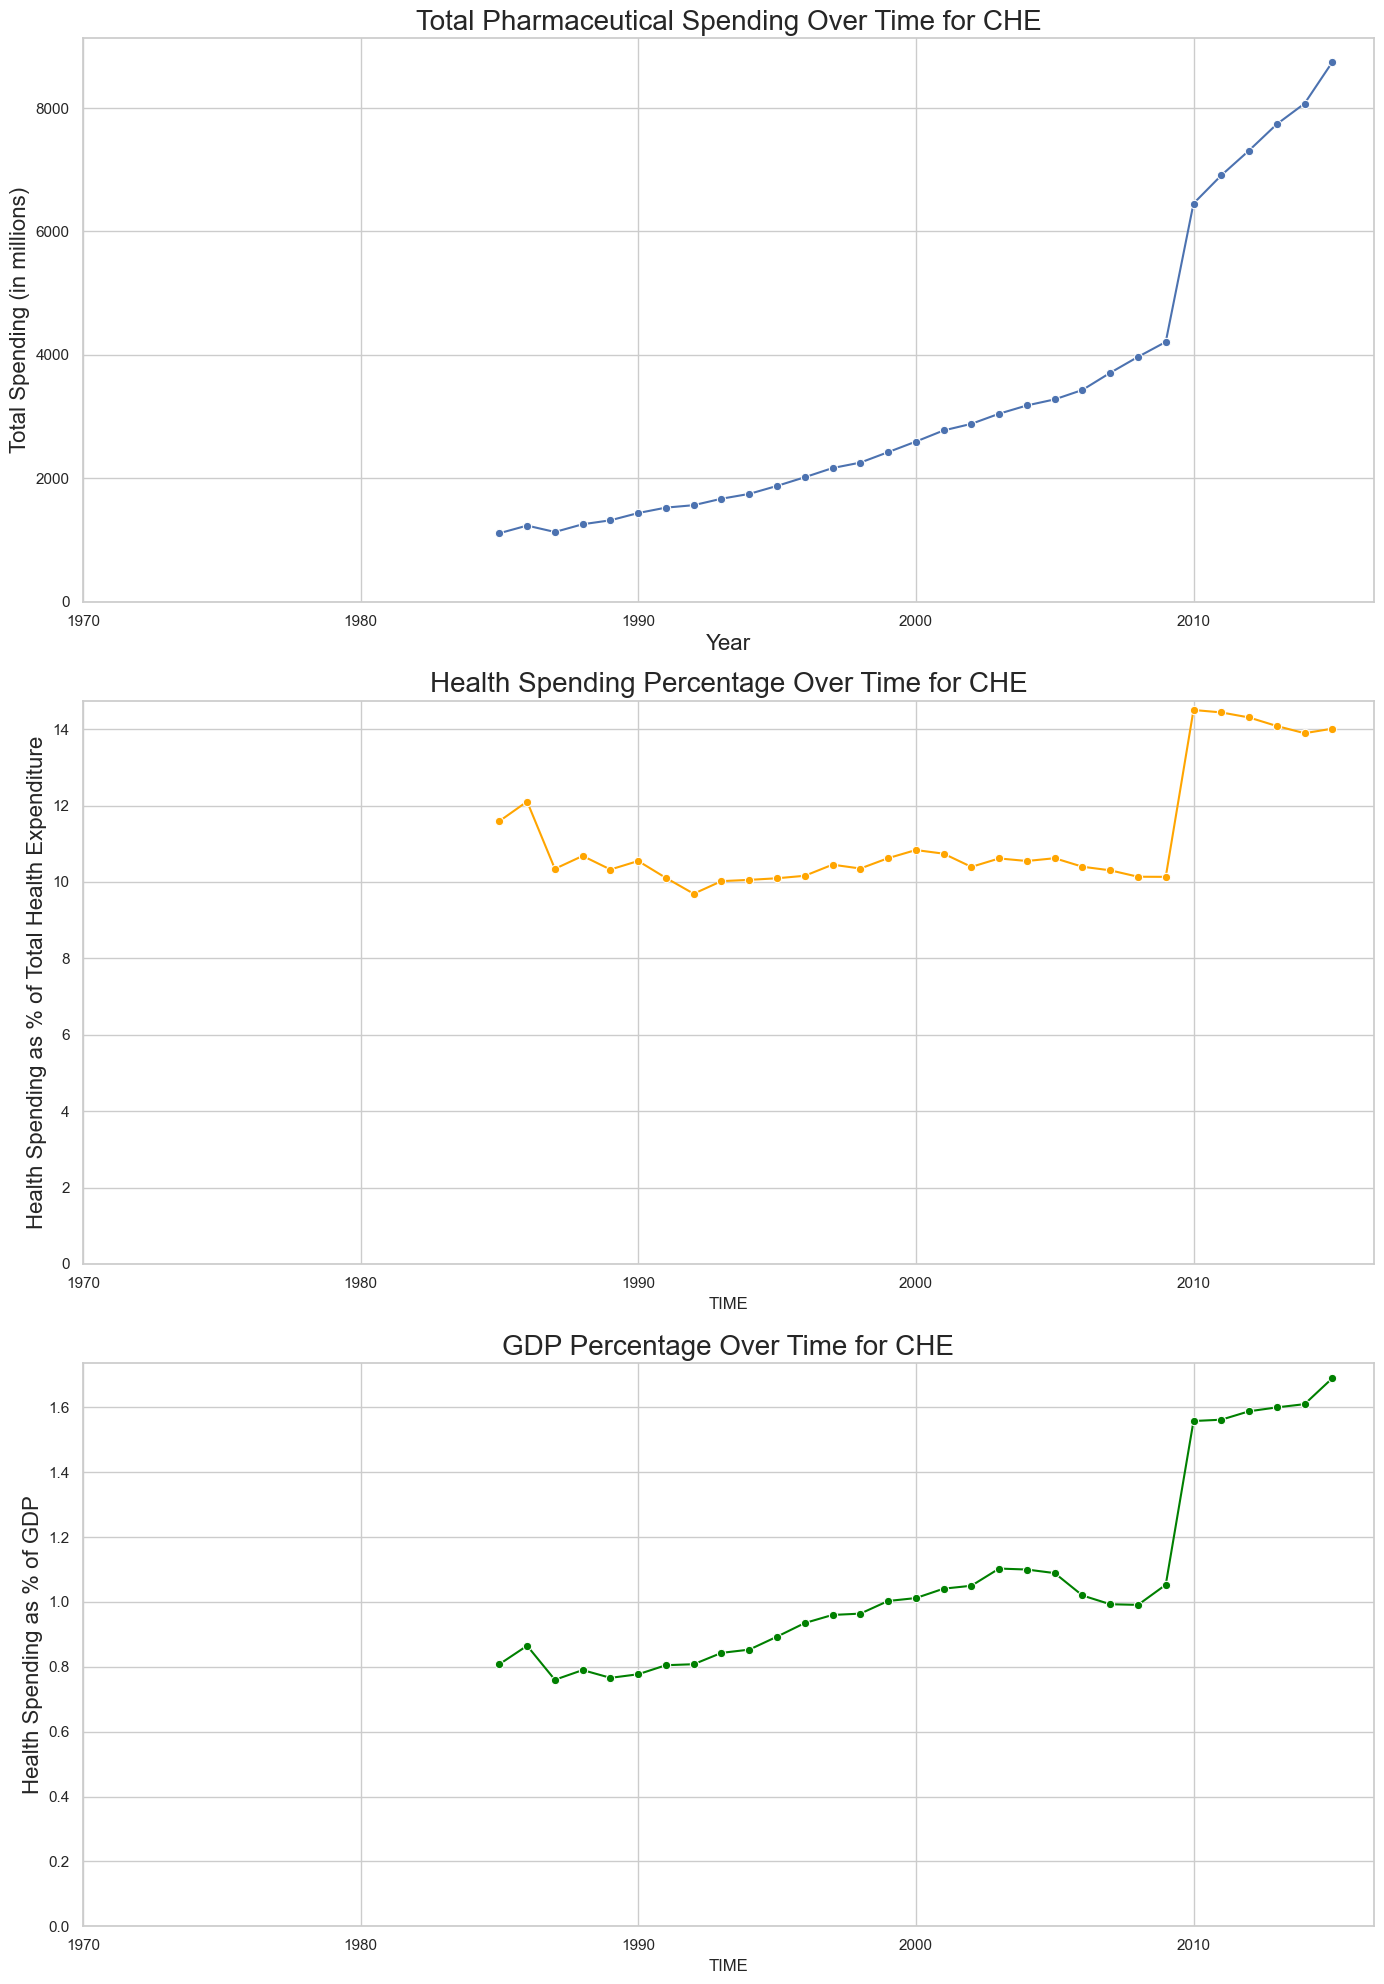

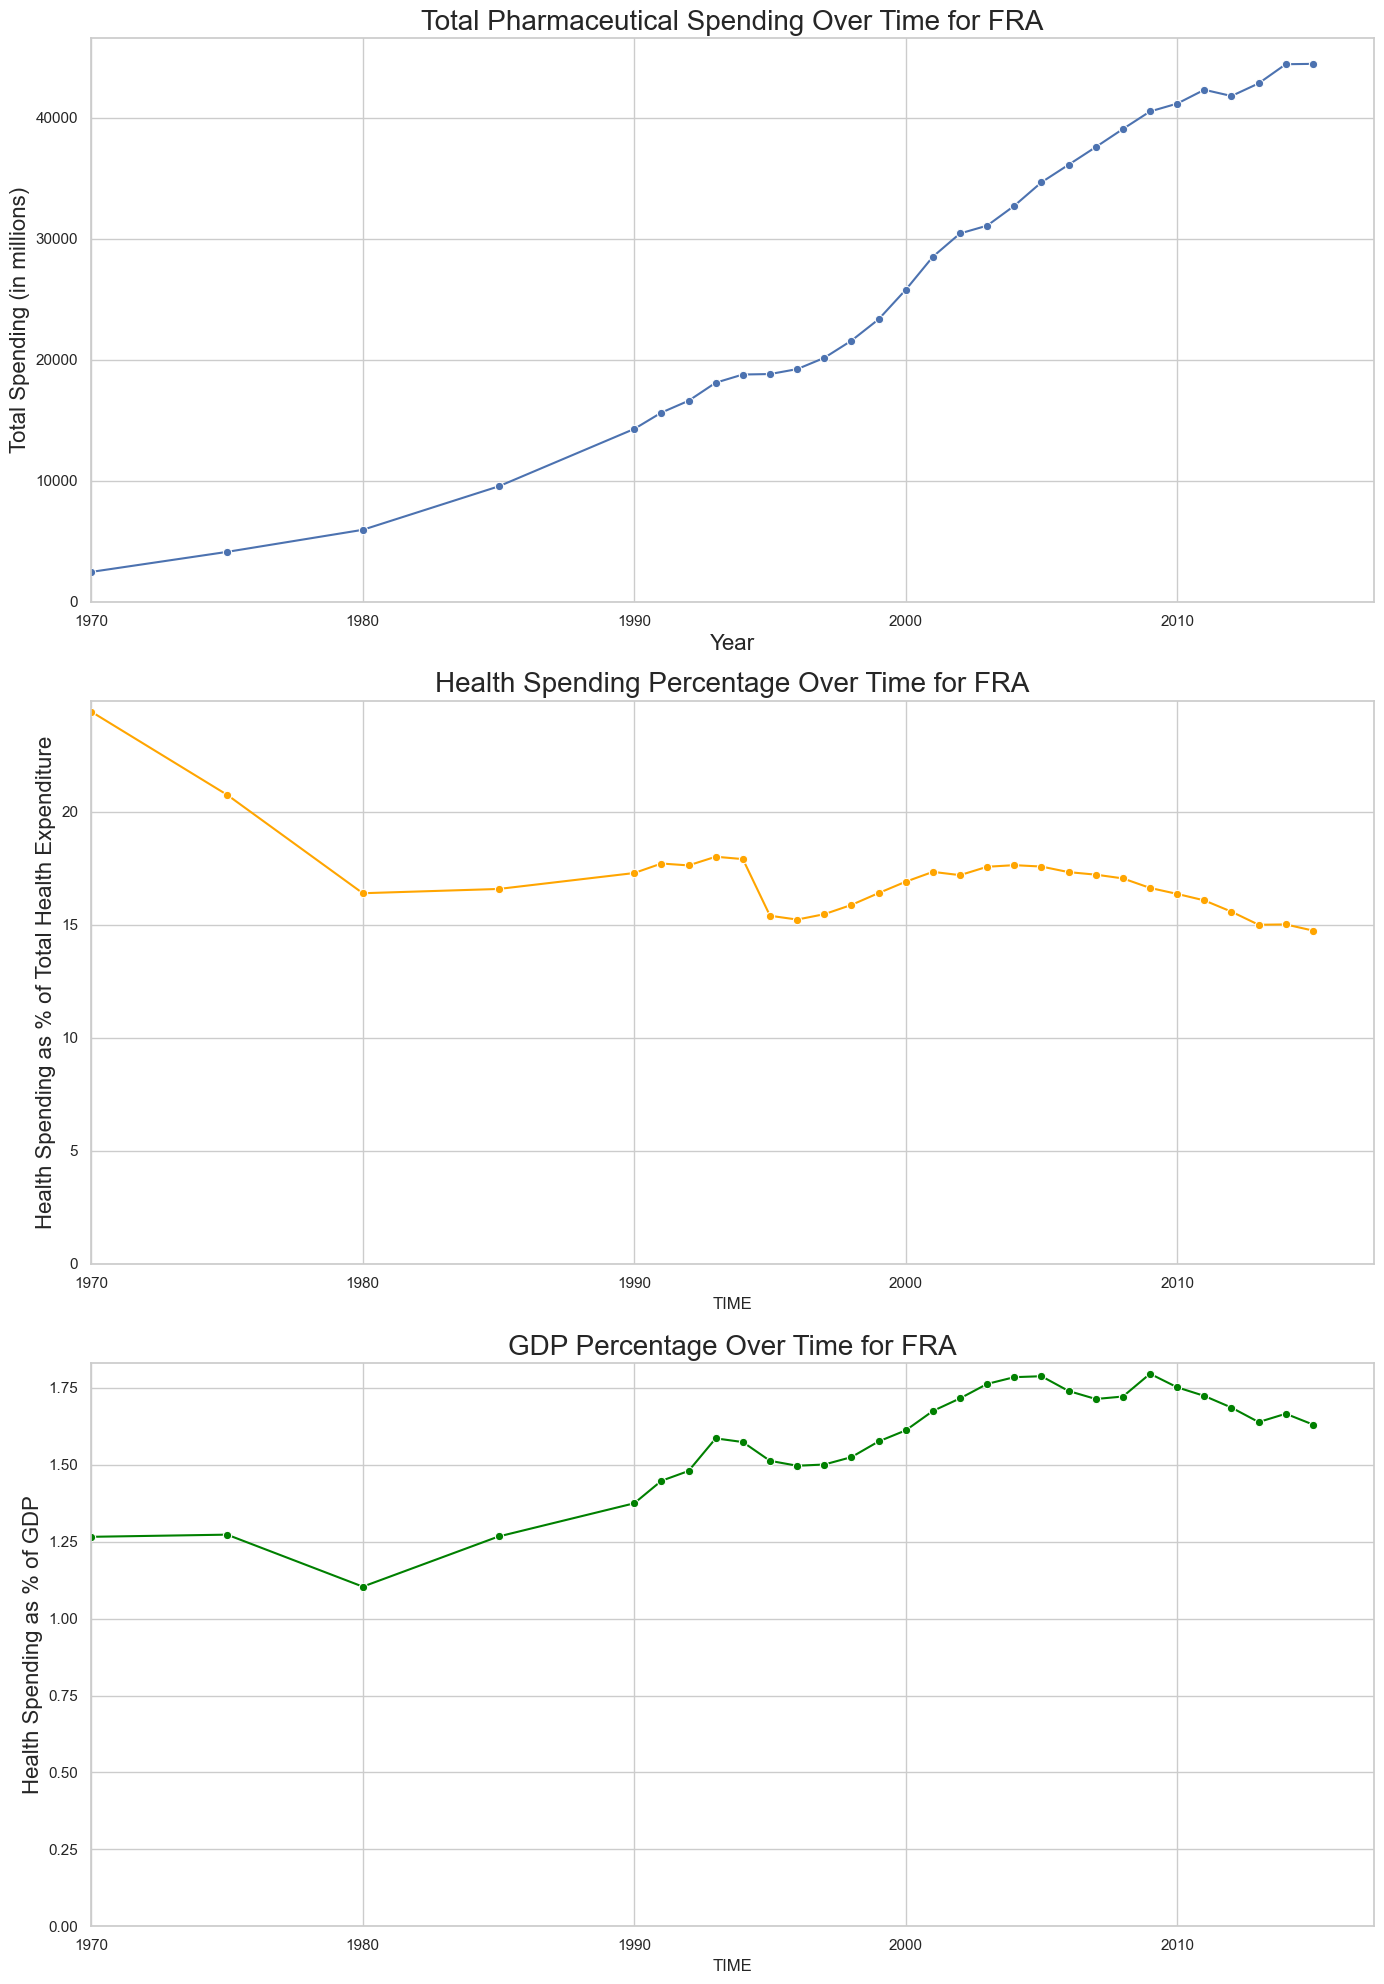

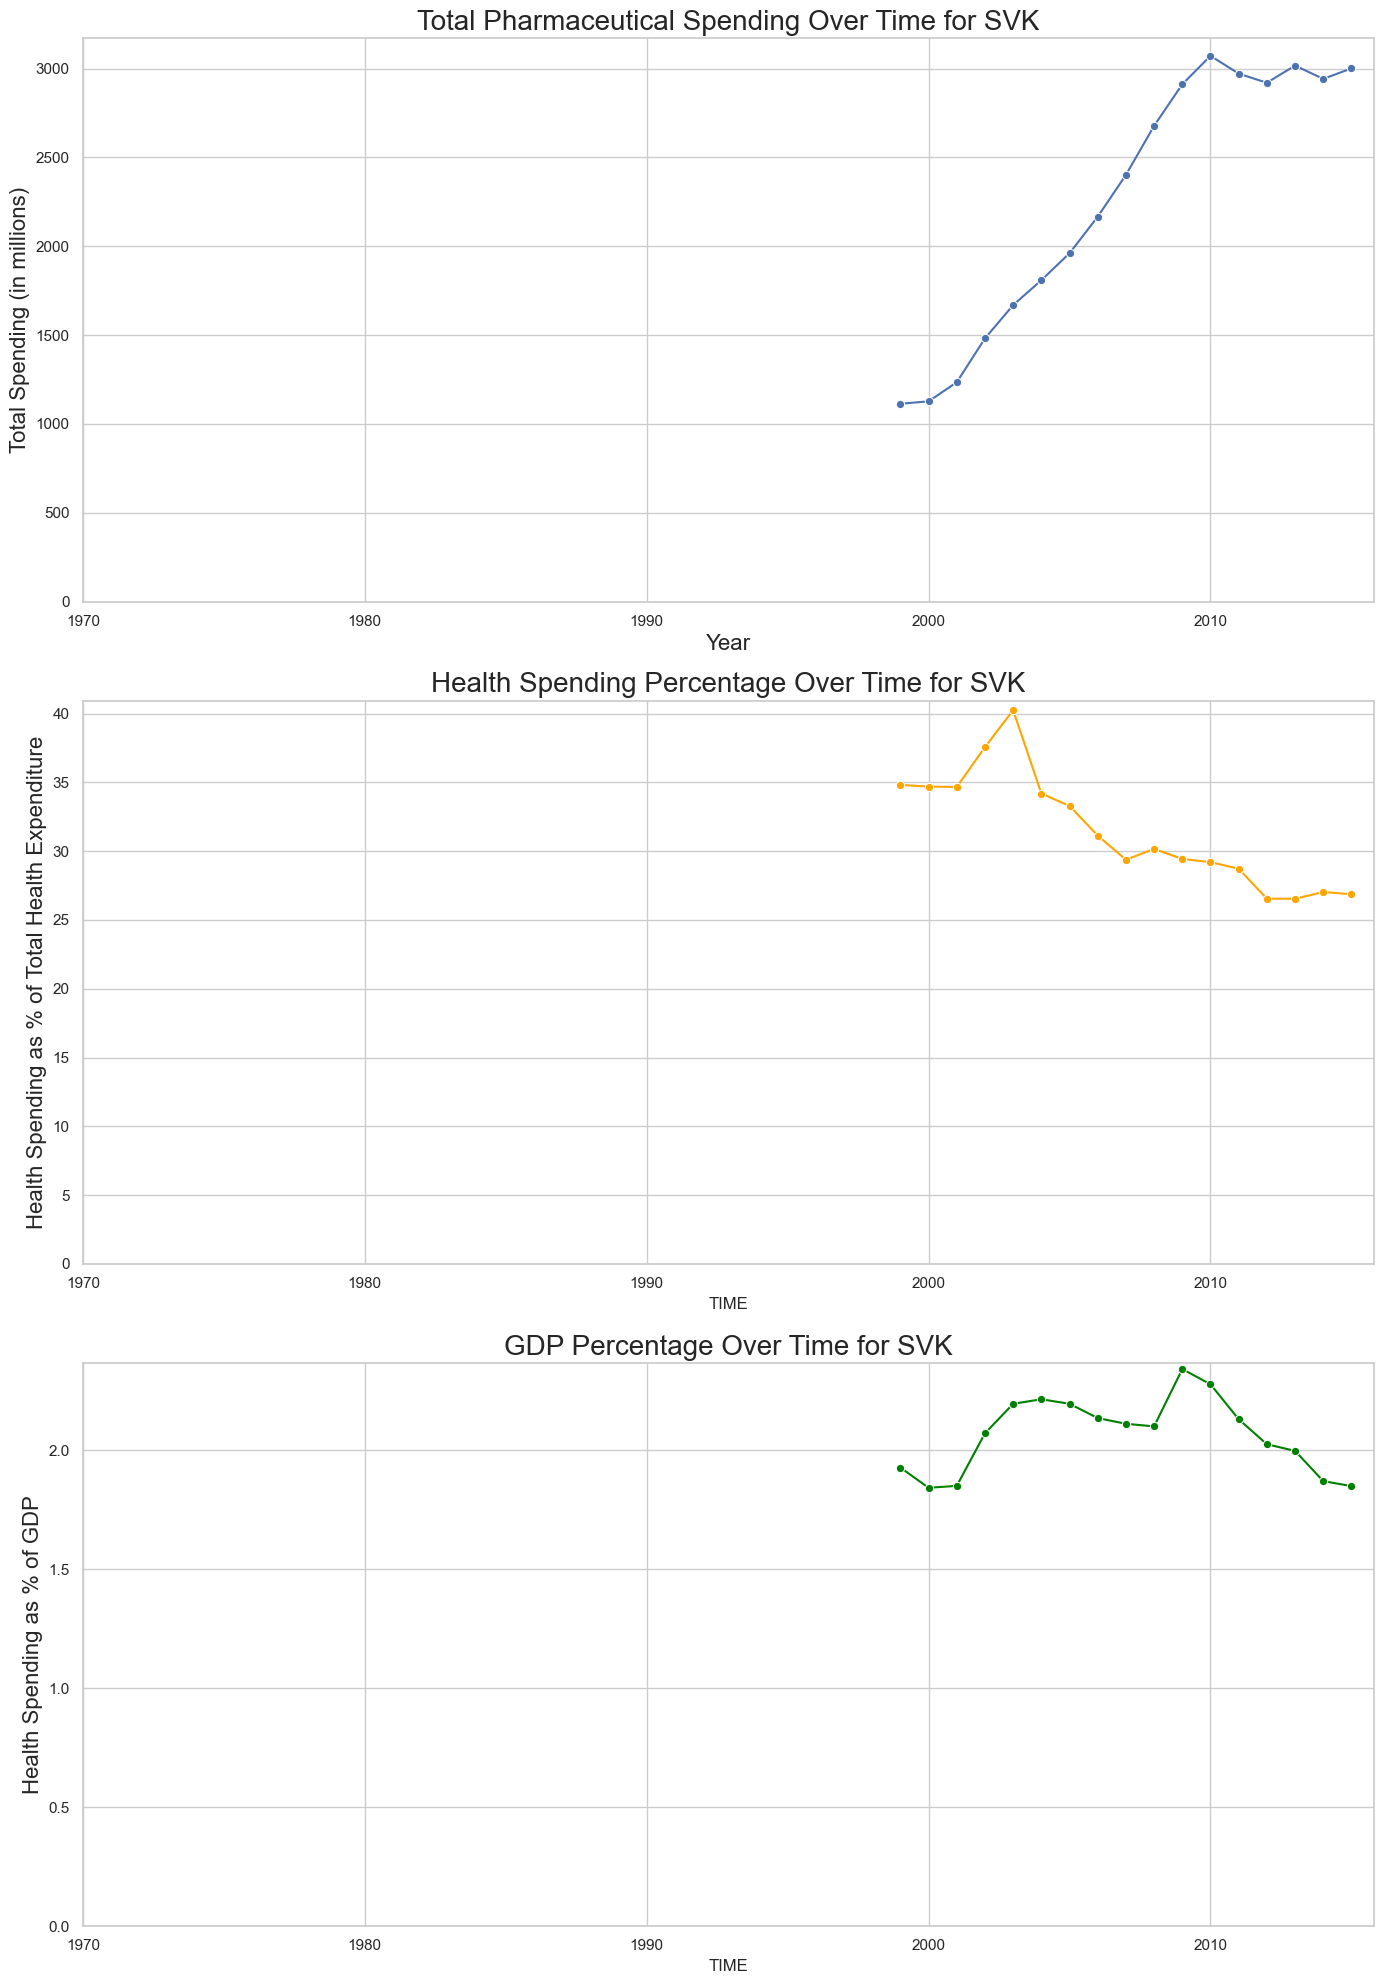

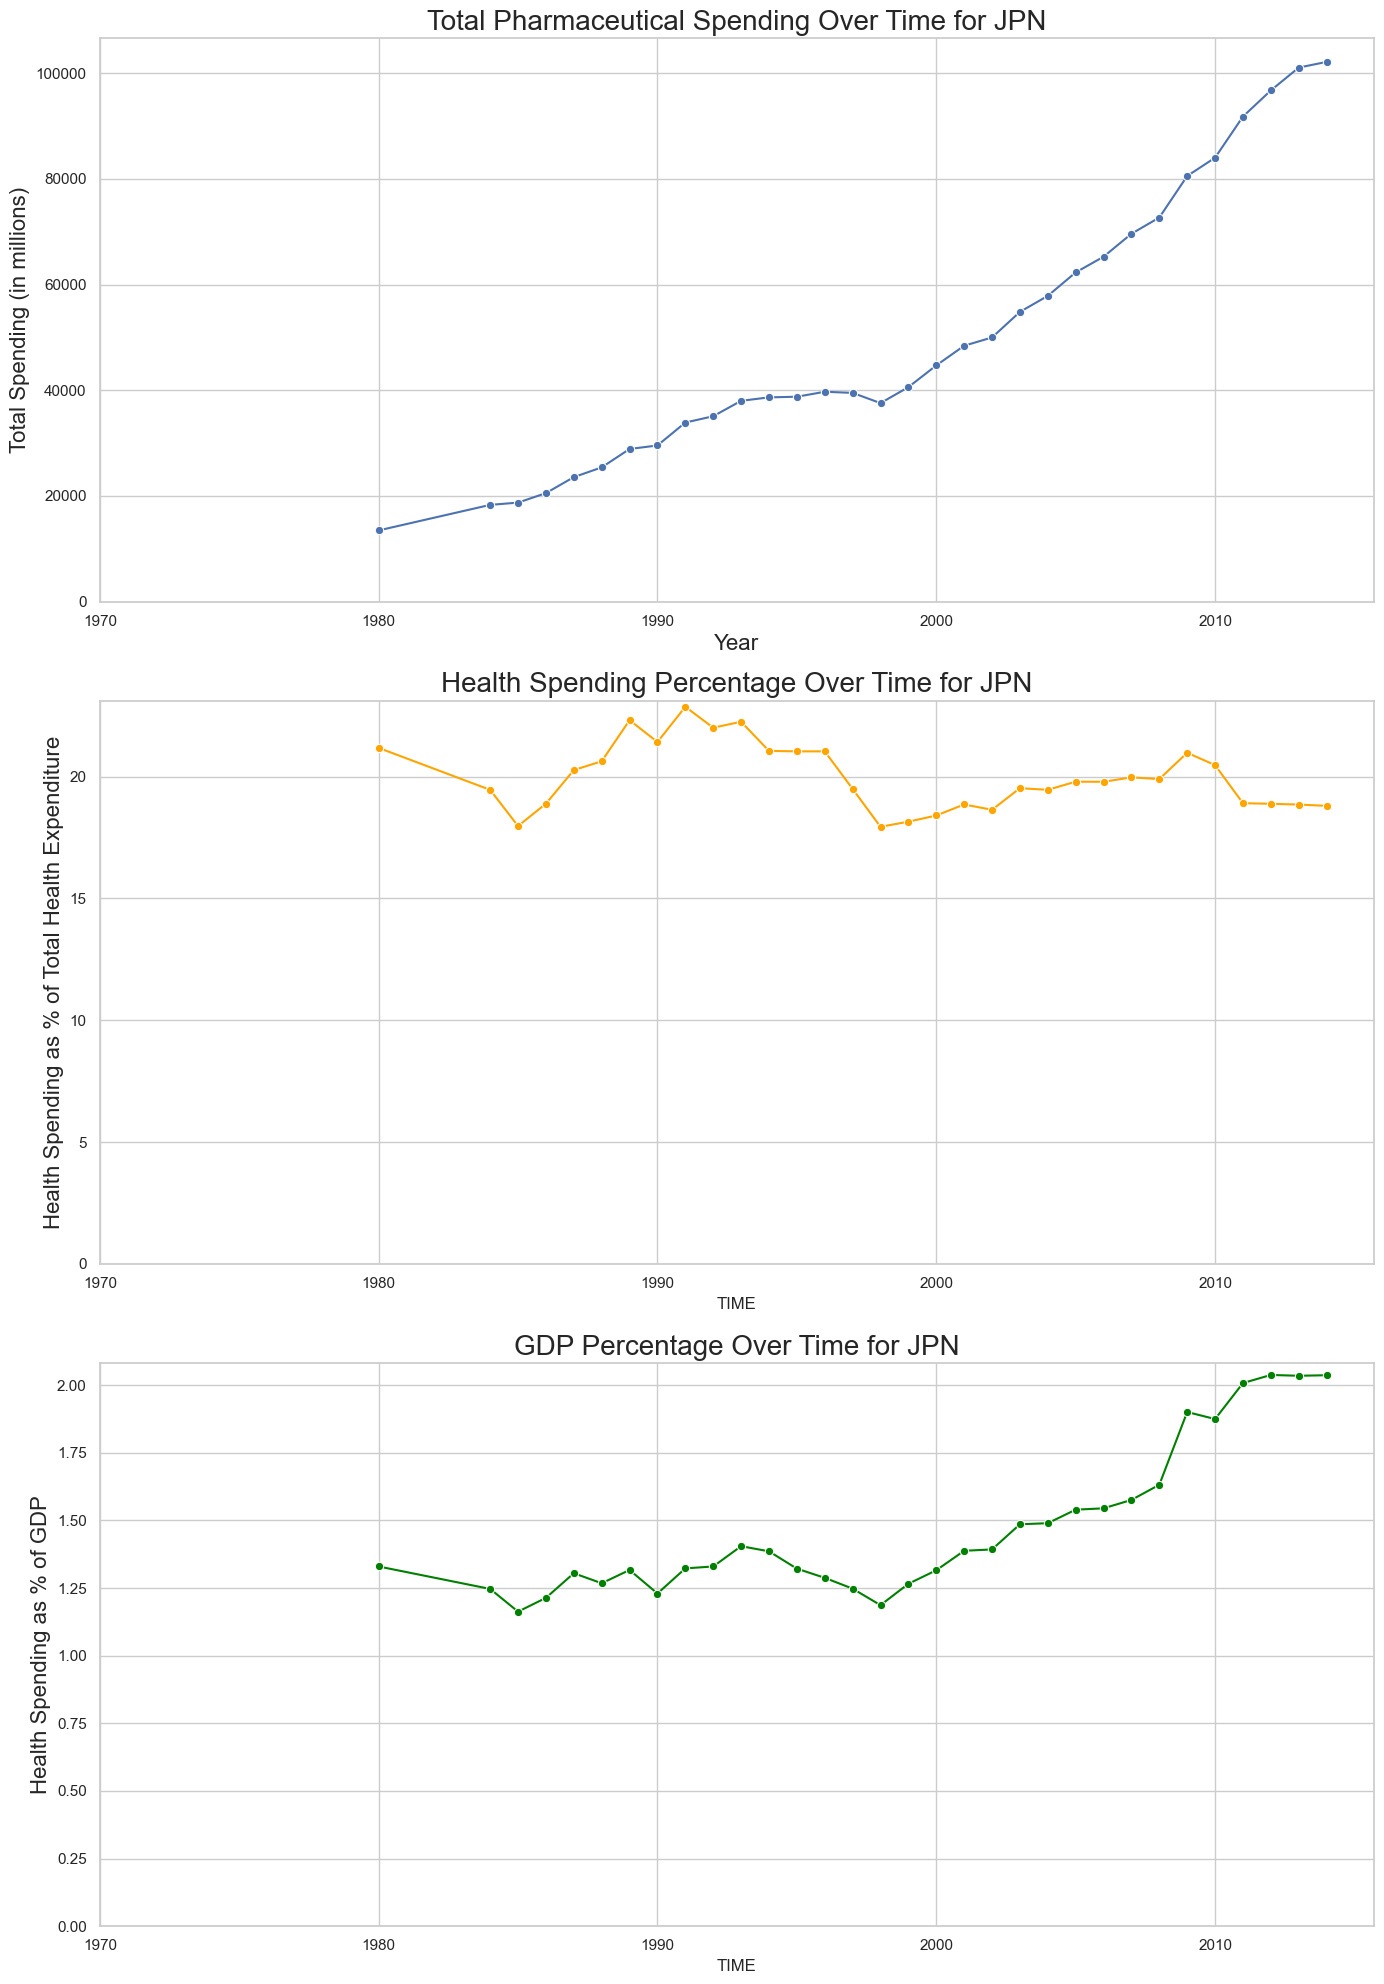

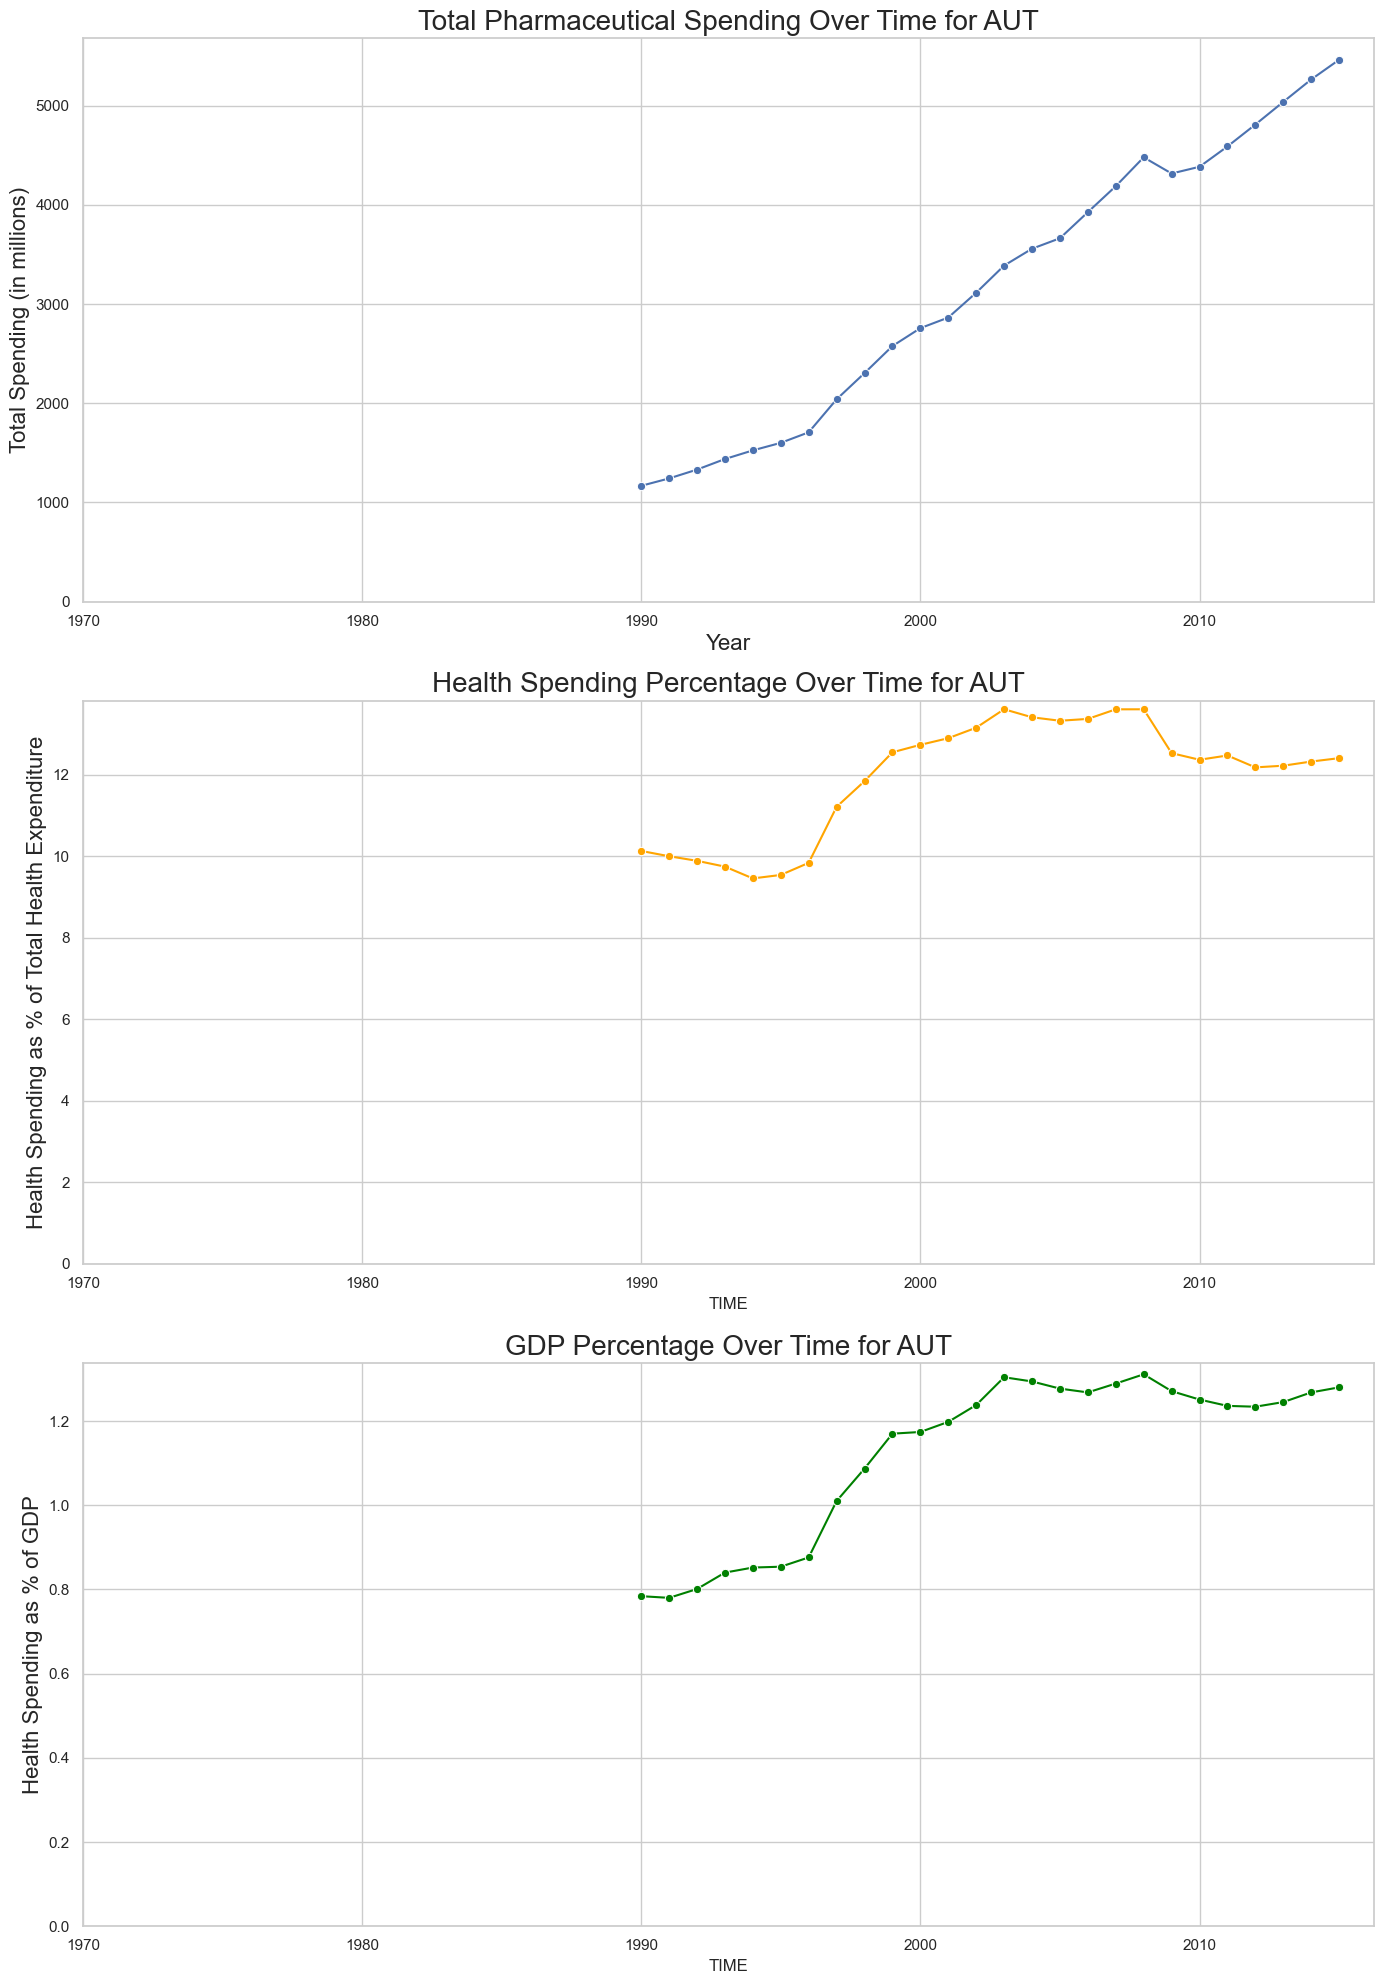

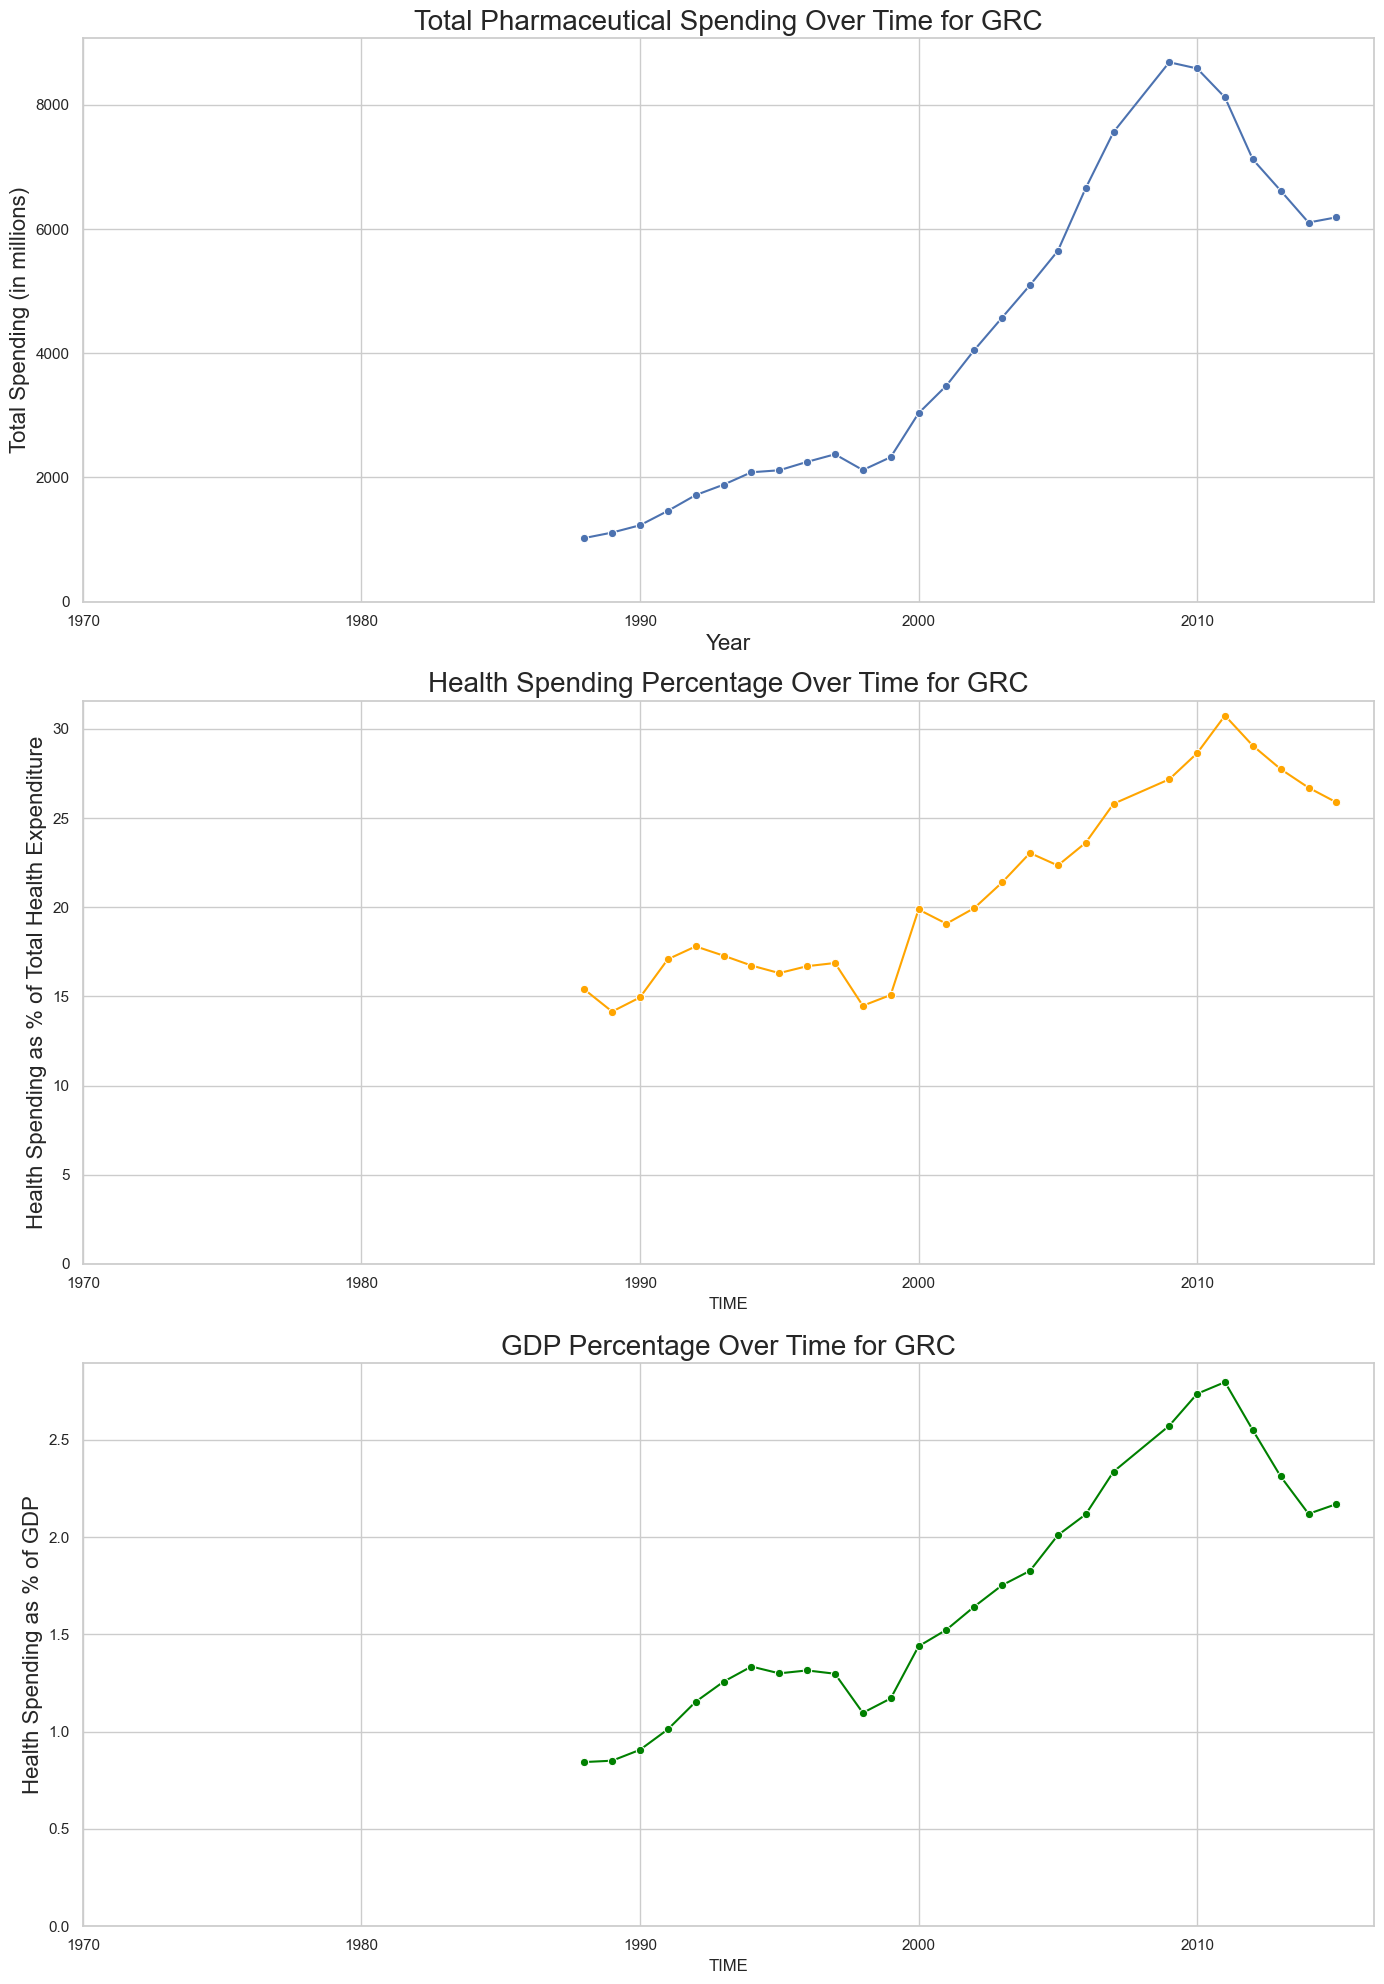

In [4]:
# Calculate the average USD_CAP per country
top_countries = (
    df.groupby('LOCATION')['USD_CAP'].mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter the DataFrame to include only the top 10 countries by USD_CAP
df_top_countries = df[df['LOCATION'].isin(top_countries)]

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Define the x-axis limits
x_axis_start = 1970
y_axis_start = 0

# Loop through only the top 10 countries
for country in top_countries:
    country_data = df_top_countries[df_top_countries['LOCATION'] == country]
    
    plt.figure(figsize=(14, 20))
    
    # Plot Total Spending
    plt.subplot(3, 1, 1)
    sns.lineplot(data=country_data, x='TIME', y='TOTAL_SPEND', marker='o')
    plt.title(f'Total Pharmaceutical Spending Over Time for {country}', fontsize = 20)
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel('Total Spending (in millions)', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    # Plot Health Expenditure Percentage
    plt.subplot(3, 1, 2)
    sns.lineplot(data=country_data, x='TIME', y='PC_HEALTHXP', marker='o', color='orange')
    plt.title(f'Health Spending Percentage Over Time for {country}', fontsize = 20)
    plt.ylabel('Health Spending as % of Total Health Expenditure', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    # Plot GDP Percentage
    plt.subplot(3, 1, 3)
    sns.lineplot(data=country_data, x='TIME', y='PC_GDP', marker='o', color='green')
    plt.title(f'GDP Percentage Over Time for {country}', fontsize = 20)
    plt.ylabel('Health Spending as % of GDP', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    plt.tight_layout()
    plt.show()
